In [7]:
import glob
import pandas as pd

In [126]:

import pandas as pd
import glob
import re
from functools import reduce

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from collections import Counter

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [3]:
#한글글꼴 쓰기.
from matplotlib import rc
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm  # 폰트 관련 용도
 
%config InlineBackend.figure_format = 'retina'

In [5]:
# 디렉토리 및 파일 이름에 맞추어 변경
font_location = 'C:/Windows/Fonts/malgun.ttf'#윈도우안에있는 폰트파일주소.
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

In [67]:
all_files = glob.glob('./datafiles/my*.xls')
all_files

['./datafiles\\myCabinetExcelData (1).xls',
 './datafiles\\myCabinetExcelData (2).xls',
 './datafiles\\myCabinetExcelData (3).xls',
 './datafiles\\myCabinetExcelData (4).xls',
 './datafiles\\myCabinetExcelData (5).xls',
 './datafiles\\myCabinetExcelData (6).xls',
 './datafiles\\myCabinetExcelData (7).xls',
 './datafiles\\myCabinetExcelData (8).xls',
 './datafiles\\myCabinetExcelData (9).xls',
 './datafiles\\myCabinetExcelData.xls']

## 파일 하나를 읽어서 df에 넣음. df을 리스트에 누적!

In [68]:
all_files_data = []##[df, df, df,...]

In [69]:
for file in all_files:
    df = pd.read_excel(file)#file하나를 읽어와서 df에 넣어라.
    all_files_data.append(df)
len(all_files_data)

10

In [70]:
all_files_data

[    Unnamed: 0   번호                                                 제목  \
 0          NaN    1        Clustering Big Spatiotemporal-Interval Data   
 1          NaN    2            Intelligent big data analysis: a review   
 2          NaN    3  Improved big data stock index prediction using...   
 3          NaN    4    Guest Editorial: Big Data Analytics and the Web   
 4          NaN    5    Guest Editorial: Big Data Analytics and the Web   
 ..         ...  ...                                                ...   
 95         NaN   96  A Detailed Review on the Prominent Compression...   
 96         NaN   97  A Survey on Data Collection for Machine Learni...   
 97         NaN   98  An overview of online based platforms for shar...   
 98         NaN   99  Divide and recombine (D&R) data science projec...   
 99         NaN  100  The Gamma Matrix to Summarize Dense and Sparse...   
 
                                                    저자  \
 0   Shao, W.; Salim, F. D.; Song, A.; B

In [71]:
df

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Architecting Time-Critical Big-Data Systems,"Basanta-Val, P.; Audsley, N. C.; Wellings, A. ...",unknown,2016
1,NaN,2,Computation migration: a new approach to execu...,"Nunes, Rickey T. P.; Deshpande, Santosh L.",Inderscience,2018
2,NaN,3,Data Science and its Relationship to Big Data ...,unknown,Mary Ann Leibert,2013
3,NaN,4,"Bring it on, Big Data: Beyond the Hype",unknown,Mary Ann Leibert,2014
4,NaN,5,Mapping essential urban land use categories (E...,"Chen, Bin; Xu, Bing; Gong, Peng",John Wiley & Sons Ltd,2021
...,...,...,...,...,...,...
95,NaN,96,Health big data analytics: current perspective...,"Kuo, Mu-Hsing; Sahama, Tony; Kushniruk, Andre ...",Inderscience,2014
96,NaN,97,Scalable big data modelling,"Patel, Jayesh",Inderscience,2021
97,NaN,98,Intelligent big data analysis: a review,"Tsai, Chun-Wei; Yang, Ya-Lan; Chiang, Ming-Cha...",Inderscience,2014
98,NaN,99,Health big data analytics: current perspective...,"Kuo, Mu-Hsing; Sahama, Tony; Kushniruk, Andre ...",Inderscience,2014


In [72]:
all_files_data_concat = pd.concat(all_files_data, 
                                  axis=0, #row병합
                                 ignore_index=True)
all_files_data_concat[:5]

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Clustering Big Spatiotemporal-Interval Data,"Shao, W.; Salim, F. D.; Song, A.; Bouguettaya, A.",unknown,2016
1,NaN,2,Intelligent big data analysis: a review,"Tsai, Chun-Wei; Yang, Ya-Lan; Chiang, Ming-Cha...",Inderscience,2015
2,NaN,3,Improved big data stock index prediction using...,"Eapen, Jithin; Verma, Abhishek; Bein, Doina",Inderscience,2021
3,NaN,4,Guest Editorial: Big Data Analytics and the Web,"Sheng, Q. Z.; Vasilakos, A. V.; Yu, Q.; Yao, L.",unknown,2015
4,NaN,5,Guest Editorial: Big Data Analytics and the Web,"Sheng, M.; Vasilakos, A. V.; Yu, Q.; You, L.",unknown,2016


In [73]:
all_files_data_concat.tail(5)

,Unnamed: 0,번호,제목,저자,출판사,출판일
995,NaN,96,Health big data analytics: current perspective...,"Kuo, Mu-Hsing; Sahama, Tony; Kushniruk, Andre ...",Inderscience,2014
996,NaN,97,Scalable big data modelling,"Patel, Jayesh",Inderscience,2021
997,NaN,98,Intelligent big data analysis: a review,"Tsai, Chun-Wei; Yang, Ya-Lan; Chiang, Ming-Cha...",Inderscience,2014
998,NaN,99,Health big data analytics: current perspective...,"Kuo, Mu-Hsing; Sahama, Tony; Kushniruk, Andre ...",Inderscience,2014
999,NaN,100,Agile Big Data Analytics for Web-Based Systems...,"Chen, H.; Kazman, R.; Haziyev, S.",unknown,2016


In [74]:
all_files_data_concat.describe()

,Unnamed: 0,번호,출판일
count,0.0,1000.000000,1000.000000
mean,NaN,50.500000,2016.528000
std,NaN,28.880514,2.611137
min,NaN,1.000000,1995.000000
25%,NaN,25.750000,2015.000000
50%,NaN,50.500000,2017.000000
75%,NaN,75.250000,2018.000000
max,NaN,100.000000,2021.000000


In [75]:
all_files_data_concat.info

<bound method DataFrame.info of      Unnamed: 0   번호                                                 제목  \
0           NaN    1        Clustering Big Spatiotemporal-Interval Data   
1           NaN    2            Intelligent big data analysis: a review   
2           NaN    3  Improved big data stock index prediction using...   
3           NaN    4    Guest Editorial: Big Data Analytics and the Web   
4           NaN    5    Guest Editorial: Big Data Analytics and the Web   
..          ...  ...                                                ...   
995         NaN   96  Health big data analytics: current perspective...   
996         NaN   97                        Scalable big data modelling   
997         NaN   98            Intelligent big data analysis: a review   
998         NaN   99  Health big data analytics: current perspective...   
999         NaN  100  Agile Big Data Analytics for Web-Based Systems...   

                                                    저자           출판

In [76]:
#데이터를 새로운 파일로 저장해보자.
all_files_data_concat.to_csv('./data_list/riss_bigdata.csv',encoding='utf8',index=False)


In [77]:
df1000 = pd.read_csv('./data_list/riss_bigdata.csv', encoding='utf8')
df1000[:5]

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Clustering Big Spatiotemporal-Interval Data,"Shao, W.; Salim, F. D.; Song, A.; Bouguettaya, A.",unknown,2016
1,NaN,2,Intelligent big data analysis: a review,"Tsai, Chun-Wei; Yang, Ya-Lan; Chiang, Ming-Cha...",Inderscience,2015
2,NaN,3,Improved big data stock index prediction using...,"Eapen, Jithin; Verma, Abhishek; Bein, Doina",Inderscience,2021
3,NaN,4,Guest Editorial: Big Data Analytics and the Web,"Sheng, Q. Z.; Vasilakos, A. V.; Yu, Q.; Yao, L.",unknown,2015
4,NaN,5,Guest Editorial: Big Data Analytics and the Web,"Sheng, M.; Vasilakos, A. V.; Yu, Q.; You, L.",unknown,2016


# 전처리

In [78]:
#제목추출
all_titles = df1000['제목']
all_titles

0            Clustering Big Spatiotemporal-Interval Data
1                Intelligent big data analysis: a review
2      Improved big data stock index prediction using...
3        Guest Editorial: Big Data Analytics and the Web
4        Guest Editorial: Big Data Analytics and the Web
                             ...                        
995    Health big data analytics: current perspective...
996                          Scalable big data modelling
997              Intelligent big data analysis: a review
998    Health big data analytics: current perspective...
999    Agile Big Data Analytics for Web-Based Systems...
Name: 제목, Length: 1000, dtype: object

In [127]:
stopwords = set(stopwords.words('english'))

In [128]:
lemma = WordNetLemmatizer()#fly, flies, flied ==> fly

In [129]:
##1. 글자만 추출(글자가 아닌 것은 공백으로 replace)
##2. 분석에 사용하지 않을 글자들을 제거하자.(불용어 처리)
##3. 표제어(글의 대표적인 글자)추출

In [130]:
words = []#전처리한 결과를 모으는 리스트

In [131]:
# for title in all_titles[0:2]:
#     ##전처리1번, 글자가 아닌 것은 공백으로 대체
#     pre1 = re.sub(r"[^a-zA-Z]+", " ", str(title))#^a-zA-Z:영어 아닌 것, + :들, " ":공백으로 대체
#     print(pre1)
#     #소문자로 변경하여 단어를 토큰으로 만들어보자.
#     pre1_lower_token = word_tokenize(pre1.lower())
#     print(pre1_lower_token)
#     ##전처리2번, 불용어 처리
#     pre2 = [w for w in pre1_lower_token if w not in stopwords]#stopwords에 없는 것들만 담기.
#     print(pre2)
#     #4.표제어
#     pre3 = [lemma.lemmatize(w) for w in pre2]
#     print(pre3)

In [132]:
for title in all_titles:
    ##전처리1번, 글자가 아닌 것은 공백으로 대체
    pre1 = re.sub(r"[^a-zA-Z]+", " ", str(title))#^a-zA-Z:영어 아닌 것, + :들, " ":공백으로 대체
    #print(pre1)
    #소문자로 변경하여 단어를 토큰으로 만들어보자.
    pre1_lower_token = word_tokenize(pre1.lower())
    print(pre1_lower_token)
    ##전처리2번, 불용어 처리
    pre2 = [w for w in pre1_lower_token if w not in stopwords]#stopwords에 없는 것들만 담기.
    #print(pre2)
    #4.표제어
    pre3 = [lemma.lemmatize(w) for w in pre2]
    #print(pre3)
    words.append(pre3)

['clustering', 'big', 'spatiotemporal', 'interval', 'data']
['intelligent', 'big', 'data', 'analysis', 'a', 'review']
['improved', 'big', 'data', 'stock', 'index', 'prediction', 'using', 'deep', 'learning', 'with', 'cnn', 'and', 'gru']
['guest', 'editorial', 'big', 'data', 'analytics', 'and', 'the', 'web']
['guest', 'editorial', 'big', 'data', 'analytics', 'and', 'the', 'web']
['guest', 'editorial', 'big', 'data', 'infrastructure', 'i']
['guest', 'editorial', 'big', 'scholar', 'data', 'discovery', 'and', 'collaboration']
['speed', 'up', 'big', 'data', 'analytics', 'by', 'unveiling', 'the', 'storage', 'distribution', 'of', 'sub', 'datasets']
['guest', 'editorial', 'big', 'scholar', 'data', 'discovery', 'and', 'collaboration']
['petuum', 'a', 'new', 'platform', 'for', 'distributed', 'machine', 'learning', 'on', 'big', 'data']
['kvasir', 'scalable', 'provision', 'of', 'semantically', 'relevant', 'web', 'content', 'on', 'big', 'data', 'framework']
['a', 'platform', 'for', 'big', 'data', 'a

['bayes', 'and', 'big', 'data', 'the', 'consensus', 'monte', 'carlo', 'algorithm']
['breaking', 'the', 'big', 'data', 'barrier', 'when', 'selecting', 'agricultural', 'export', 'markets', 'an', 'innovative', 'approach']
['why', 'the', 'big', 'buzz', 'about', 'big', 'data']
['music', 'and', 'big', 'data', 'a', 'new', 'frontier']
['architecting', 'time', 'critical', 'big', 'data', 'systems']
['computation', 'migration', 'a', 'new', 'approach', 'to', 'execute', 'big', 'data', 'bioinformatics', 'workflows']
['data', 'science', 'and', 'its', 'relationship', 'to', 'big', 'data', 'and', 'data', 'driven', 'decision', 'making']
['bring', 'it', 'on', 'big', 'data', 'beyond', 'the', 'hype']
['mapping', 'essential', 'urban', 'land', 'use', 'categories', 'euluc', 'using', 'geospatial', 'big', 'data', 'progress', 'challenges', 'and', 'opportunities']
['big', 'boe', 'fusing', 'spanish', 'official', 'gazette', 'with', 'big', 'data', 'technology']
['the', 'structural', 'consequences', 'of', 'big', 'data

In [133]:
words[:1]

[['clustering', 'big', 'spatiotemporal', 'interval', 'data']]

In [134]:
len(words)

1000

In [135]:
reduce(lambda x,y : x + y, words[:2])#결과 list
#여러개의 리스트를 하나로 합하고 싶을 때 (요약하고 싶을 때)

['clustering',
 'big',
 'spatiotemporal',
 'interval',
 'data',
 'intelligent',
 'big',
 'data',
 'analysis',
 'review']

In [136]:
words2 = reduce(lambda x,y : x + y, words)
print(type(words2))
words2[:10]

<class 'list'>


['clustering',
 'big',
 'spatiotemporal',
 'interval',
 'data',
 'intelligent',
 'big',
 'data',
 'analysis',
 'review']

In [137]:
count = Counter(words2)
count

Counter({'clustering': 9,
         'big': 1119,
         'spatiotemporal': 1,
         'interval': 3,
         'data': 1250,
         'intelligent': 13,
         'analysis': 79,
         'review': 25,
         'improved': 5,
         'stock': 4,
         'index': 6,
         'prediction': 19,
         'using': 62,
         'deep': 9,
         'learning': 41,
         'cnn': 1,
         'gru': 1,
         'guest': 13,
         'editorial': 16,
         'analytics': 93,
         'web': 10,
         'infrastructure': 10,
         'scholar': 3,
         'discovery': 13,
         'collaboration': 6,
         'speed': 1,
         'unveiling': 1,
         'storage': 9,
         'distribution': 10,
         'sub': 1,
         'datasets': 2,
         'petuum': 1,
         'new': 43,
         'platform': 28,
         'distributed': 19,
         'machine': 21,
         'kvasir': 1,
         'scalable': 14,
         'provision': 2,
         'semantically': 2,
         'relevant': 1,
         'cont

In [138]:
count.most_common(5)

[('data', 1250),
 ('big', 1119),
 ('analytics', 93),
 ('based', 87),
 ('analysis', 79)]

In [139]:
## 빈도수가 5이하인 것은 목록에서 제거해버리자.
count.most_common(2)#튜플형태

[('data', 1250), ('big', 1119)]

In [140]:
for one in count.most_common(2):
    print(one)

('data', 1250)
('big', 1119)


In [141]:
for tag,counts in count.most_common(2):#튜플 분리해보자. one대신 x,y넣기.
    print(tag,',',counts)

data , 1250
big , 1119


In [142]:
# word_count = dict()
# for tag,counts in count.most_common(2):#튜플 분리해보자. one대신 x,y넣기.
#     if(counts > 5):
#         word_count[tag] = counts#'data',5000
# print(word_count)

In [151]:
word_count = dict()
for tag,counts in count.most_common(50):#튜플 분리해보자. one대신 x,y넣기.
    if(counts > 30):#빈도수가 30이상인 것만 추출
        word_count[tag] = counts#'data',5000
print(word_count)

{'data': 1250, 'big': 1119, 'analytics': 93, 'based': 87, 'analysis': 79, 'using': 62, 'driven': 58, 'approach': 53, 'challenge': 51, 'system': 49, 'model': 44, 'new': 43, 'learning': 41, 'application': 38, 'science': 37, 'framework': 33, 'health': 33, 'management': 32, 'opportunity': 31, 'research': 31}


In [152]:
##너무 주제와 일치하는 단어는 dict에서 제거해버리자.
del word_count['big']
del word_count['data']

In [153]:
word_count

{'analytics': 93,
 'based': 87,
 'analysis': 79,
 'using': 62,
 'driven': 58,
 'approach': 53,
 'challenge': 51,
 'system': 49,
 'model': 44,
 'new': 43,
 'learning': 41,
 'application': 38,
 'science': 37,
 'framework': 33,
 'health': 33,
 'management': 32,
 'opportunity': 31,
 'research': 31}

In [154]:
word_count.values() 

dict_values([93, 87, 79, 62, 58, 53, 51, 49, 44, 43, 41, 38, 37, 33, 33, 32, 31, 31])

In [155]:
sorted_wc = sorted(word_count.values(),reverse=True)#역순으로 해보자.

In [156]:
sorted_wc

[93, 87, 79, 62, 58, 53, 51, 49, 44, 43, 41, 38, 37, 33, 33, 32, 31, 31]

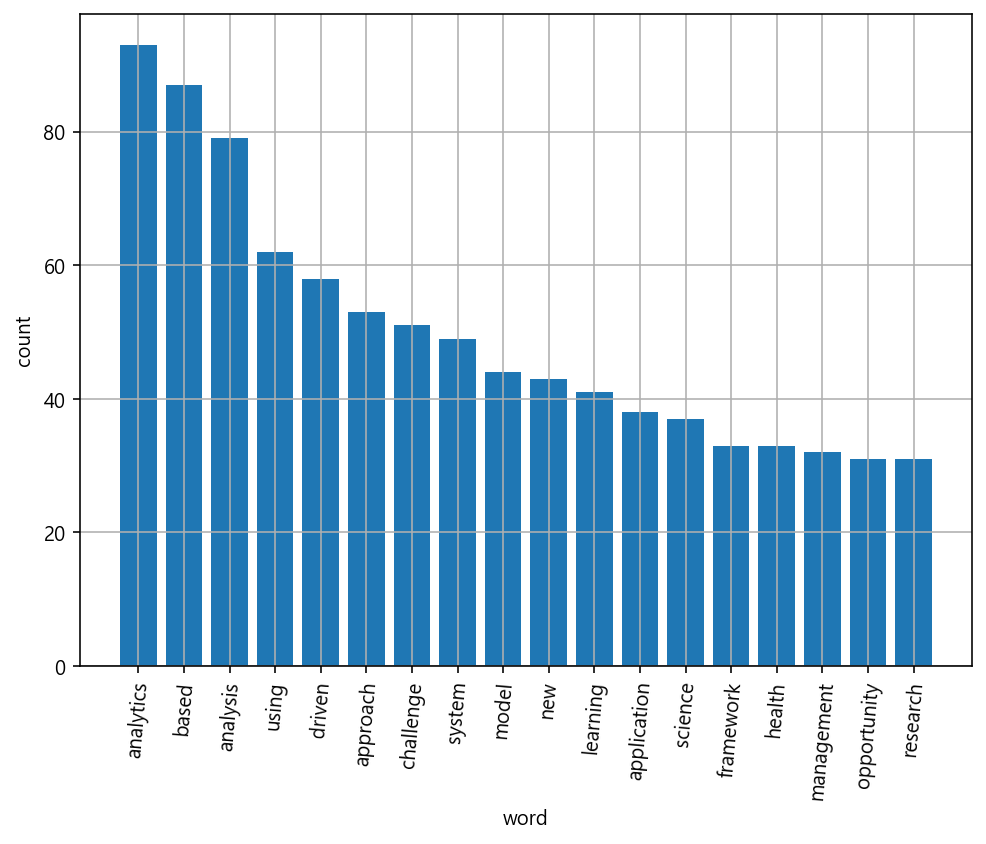

In [157]:
plt.figure(figsize=(8,6))
plt.xlabel('word')
plt.ylabel('count')
plt.grid(True)

plt.bar(range(len(word_count)), word_count.values())
plt.xticks(range(len(word_count)), word_count.keys(), rotation='85')
plt.show()